<h2><a href="https://leetcode.com/problems/minimum-number-of-days-to-disconnect-island/">1568. Minimum Number of Days to Disconnect Island</a></h2><h3>Hard</h3><hr><p>You are given an <code>m x n</code> binary grid <code>grid</code> where <code>1</code> represents land and <code>0</code> represents water. An <strong>island</strong> is a maximal <strong>4-directionally</strong> (horizontal or vertical) connected group of <code>1</code>&#39;s.</p>

<p>The grid is said to be <strong>connected</strong> if we have <strong>exactly one island</strong>, otherwise is said <strong>disconnected</strong>.</p>

<p>In one day, we are allowed to change <strong>any </strong>single land cell <code>(1)</code> into a water cell <code>(0)</code>.</p>

<p>Return <em>the minimum number of days to disconnect the grid</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/12/24/land1.jpg" style="width: 500px; height: 169px;" />
<pre>
<strong>Input:</strong> grid = [[0,1,1,0],[0,1,1,0],[0,0,0,0]]

<strong>Output:</strong> 2
<strong>Explanation:</strong> We need at least 2 days to get a disconnected grid.
Change land grid[1][1] and grid[0][2] to water and get 2 disconnected island.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/12/24/land2.jpg" style="width: 404px; height: 85px;" />
<pre>
<strong>Input:</strong> grid = [[1,1]]
<strong>Output:</strong> 2
<strong>Explanation:</strong> Grid of full water is also disconnected ([[1,1]] -&gt; [[0,0]]), 0 islands.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == grid.length</code></li>
	<li><code>n == grid[i].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 30</code></li>
	<li><code>grid[i][j]</code> is either <code>0</code> or <code>1</code>.</li>
</ul>


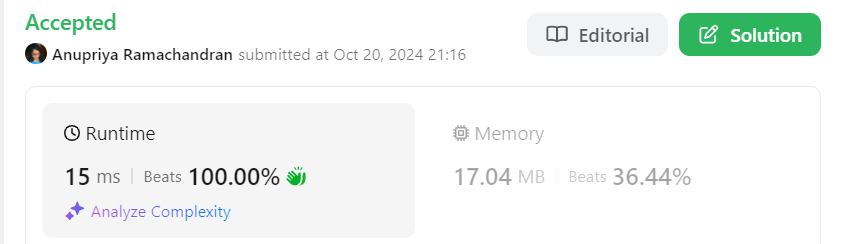

In [1]:
from typing import List

directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]

class Solution:
    def minDays(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        sep_info = self.IslandInfo(False, 0)
        total_land, total_island = 0, 0

        discovery_time = [[-1]*cols for _ in range(rows)]
        low = [[-1]*cols for _ in range(rows)]
        parent = [[-1]* cols for _ in range(rows)]

        for row in range(rows):
            for col in range(cols):
                if grid[row][col] == 1:
                    total_land += 1
                    if discovery_time[row][col] == -1:
                        self.findcriticalpoints(grid, row, col, discovery_time, low, parent, sep_info)
                        total_island += 1

        if total_island == 0 or total_island >= 2: return 0   # Already disconnected or no land
        if total_land == 1: return 1 # only 1 land cell present
        if sep_info.hasCriticalPoint: return 1
        return 2


    def findcriticalpoints(self, grid, row, col, discovery_time, low, parent, sep_info):
        rows, cols = len(grid), len(grid[0])
        discovery_time[row][col] = low[row][col] = sep_info.discoverytime
        sep_info.discoverytime += 1
        
        children = 0

        for dx, dy in directions:
            newrow = row + dx
            newcol = col + dy
            if 0 <= newrow < rows and 0 <= newcol < cols and grid[newrow][newcol] == 1:
                if discovery_time[newrow][newcol] == -1:  # if not visited
                    children += 1   # increase children count
                    parent[newrow][newcol] = row*cols + col   # Mark parent as row*totalcols + col
                    self.findcriticalpoints(grid, newrow, newcol, discovery_time, low, parent,    # dfs
                    sep_info)

                    low[row][col] = min(low[row][col], low[newrow][newcol])   

                    if low[newrow][newcol] >= discovery_time[row][col] and parent[row][col] != -1:  # nonroot -check articulation points
                         sep_info.hasCriticalPoint = True
                elif newrow* cols + newcol  != parent[row][col]:
                    low[row][col] = min(low[row][col], discovery_time[newrow][newcol]) # update min 



        if parent[row][col] == -1 and children > 1:   # check forroot
            sep_info.hasCriticalPoint = True


    class IslandInfo:
        def __init__(self,hasCriticalPoint: bool, discoverytime ):
            self.hasCriticalPoint = hasCriticalPoint
            self.discoverytime = discoverytime


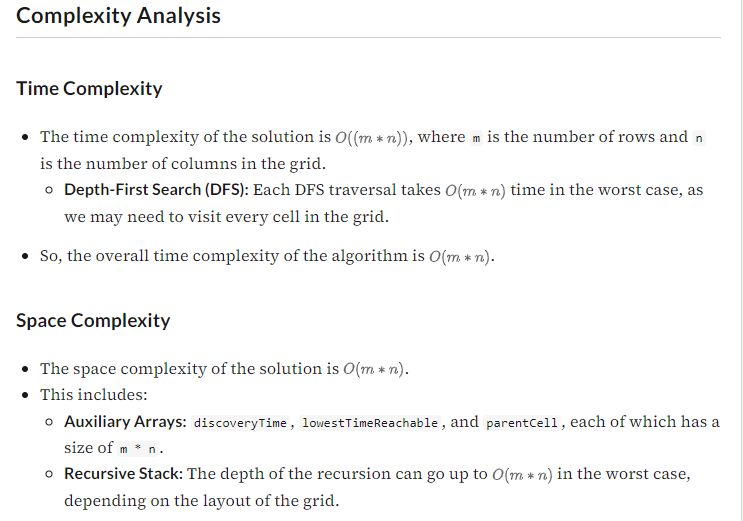